# Install and import all necessary libraries in your Jupyter notebook.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [9]:
# Define Path
path = r"C:\Users\toloz\Achivement 6 data immersion\02 data\air bnb" 

In [10]:
# Import data 
df_listings = pd.read_csv(os.path.join(path, 'Listings_Cleaned.csv'))
df_neighbourhoods = pd.read_csv(os.path.join(path, 'Neighbourhoods_Cleaned.csv'))
df_calendar = pd.read_csv(os.path.join(path, 'Calendar_Cleaned.csv'))
df_listings_details = pd.read_csv(os.path.join(path, 'Listings_Details_Cleaned.csv'))

#df_listings.head()
#df_calendar.head()
#df_listings_details.head()
#df_neighbourhoods.head()

#Neighbourhoods_Cleaned
#Listings_Details_Cleaned
#Listings_Cleaned
#Calendar_Cleaned 

In [11]:
df_listings_details.columns

Index(['Unnamed: 0', 'id', 'name', 'space', 'experiences_offered',
       'neighborhood_overview', 'access', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'cancel

In [12]:
# List of DataFrames
dfs = [df_listings, df_calendar, df_listings_details, df_neighbourhoods]

# Drop the 'Unnamed: 0' column from each DataFrame
for df in dfs:
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
# Check the data types of all columns
print(df_listings_details.dtypes)

# Separate numerical and categorical columns
numerical_cols = df_listings_details_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_listings_details_cleaned.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


id                                  int64
name                               object
space                              object
experiences_offered                object
neighborhood_overview              object
access                             object
street                             object
neighbourhood                      object
neighbourhood_cleansed             object
city                               object
state                              object
zipcode                            object
smart_location                     object
country_code                       object
country                            object
latitude                          float64
longitude                         float64
is_location_exact                  object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              

NameError: name 'df_listings_details_cleaned' is not defined

In [22]:
# List of columns to remove
columns_to_remove = [
    'name', 'space', 'experiences_offered', 'neighborhood_overview', 'access',
    'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
    'zipcode', 'smart_location', 'country_code', 'country', 'is_location_exact',
    'property_type', 'room_type', 'bed_type', 'amenities', 'extra_people',
    'calendar_updated', 'has_availability', 'requires_license', 'license',
    'cancellation_policy', 'id', 'square_feet', 'weekly_price', 'monthly_price',
    'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
    'availability_30', 'availability_60', 'availability_90',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    'calculated_host_listings_count'
]

# Remove the columns from the DataFrame
df_listings_details_cleaned = df_listings_details.drop(columns=columns_to_remove)

# Display the updated DataFrame
print(df_listings_details_cleaned.head())


    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0  52.365755   4.941419             2        1.5       1.0   2.0   59.0   
1  52.390225   4.873924             5        1.0       2.0   2.0  160.0   
2  52.365087   4.893541             2        1.0       1.0   1.0   80.0   
3  52.373114   4.883668             3        1.0       1.0   1.0  125.0   
4  52.386727   4.892078             2        1.0       1.0   1.0  150.0   

   guests_included  availability_365  number_of_reviews  review_scores_rating  
0                1                44                248                  97.0  
1                2                47                 42                  96.0  
2                2               198                233                  87.0  
3                2               141                  1                 100.0  
4                1               199                171                  99.0  


In [24]:
df_listings_details_cleaned.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'availability_365',
       'number_of_reviews', 'review_scores_rating'],
      dtype='object')

In [26]:
# Drop the 'latitude' and 'longitude' columns
df_listings_details_cleaned = df_listings_details_cleaned.drop(columns=['latitude', 'longitude'])

# Display the updated DataFrame
print(df_listings_details_cleaned.head())


   accommodates  bathrooms  bedrooms  beds  price  guests_included  \
0             2        1.5       1.0   2.0   59.0                1   
1             5        1.0       2.0   2.0  160.0                2   
2             2        1.0       1.0   1.0   80.0                2   
3             3        1.0       1.0   1.0  125.0                2   
4             2        1.0       1.0   1.0  150.0                1   

   availability_365  number_of_reviews  review_scores_rating  
0                44                248                  97.0  
1                47                 42                  96.0  
2               198                233                  87.0  
3               141                  1                 100.0  
4               199                171                  99.0  


### Removed the other numerical columns because values were to spread out could be bias for the k-means

# Use the elbow technique.

In [30]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [32]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to use for K-means clustering
features = df_listings_details_cleaned[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'availability_365', 'number_of_reviews', 'review_scores_rating']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [34]:
score = [kmeans[i].fit(df_listings_details_cleaned).score(df_listings_details_cleaned) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\toloz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\toloz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\toloz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\toloz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

[-681035091.5550169,
 -482120635.2724774,
 -290069258.53073084,
 -213642470.3298668,
 -173441995.78821585,
 -143375630.37085608,
 -124861755.07410447,
 -108996054.70574538,
 -94248554.43103395]

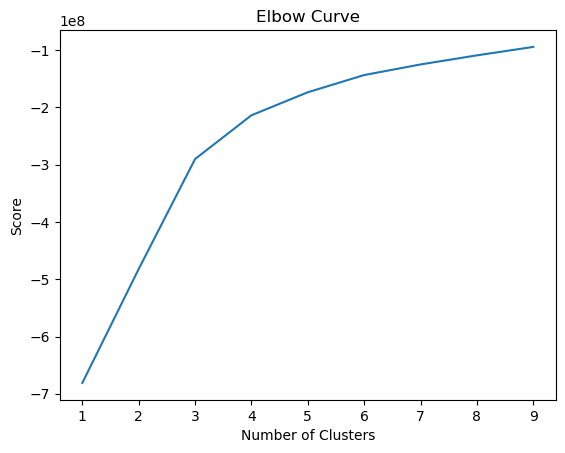

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.Explain why you chose that number in a markdown cell.If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

### I decided to use 4 clusters since  is where the curve begins to flatten out

# Run the k-means algorithm.

In [39]:

kmeans = KMeans(n_clusters = 4) 

In [40]:
# Fit the k-means object to the data.

kmeans.fit(df_listings_details_cleaned)

C:\Users\toloz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

# Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [46]:
df_listings_details_cleaned['clusters'] = kmeans.fit_predict(df_listings_details_cleaned)

C:\Users\toloz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df_listings_details_cleaned.head()

,accommodates,bathrooms,bedrooms,beds,price,guests_included,availability_365,number_of_reviews,review_scores_rating,clusters
0,2,1.5,1.0,2.0,59.0,1,44,248,97.0,0
1,5,1.0,2.0,2.0,160.0,2,47,42,96.0,0
2,2,1.0,1.0,1.0,80.0,2,198,233,87.0,3
3,3,1.0,1.0,1.0,125.0,2,141,1,100.0,0
4,2,1.0,1.0,1.0,150.0,1,199,171,99.0,3


# Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

In [51]:
df_listings_details_cleaned['clusters'].value_counts()

clusters
0    15984
3     3086
1      952
2        8
Name: count, dtype: int64

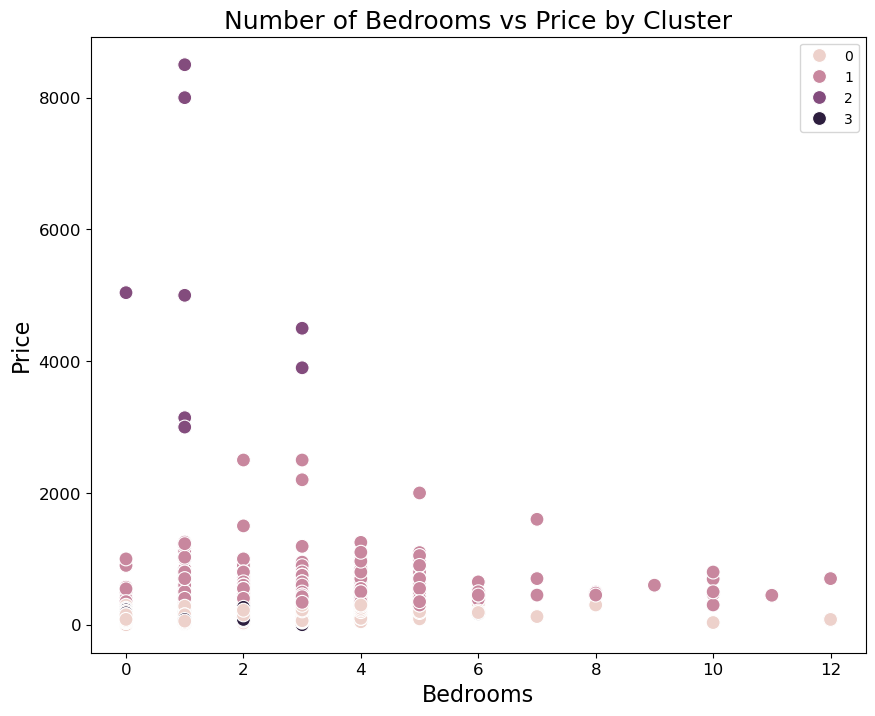

In [73]:


# Plot with increased label sizes
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x=df_listings_details_cleaned['bedrooms'], y=df_listings_details_cleaned['price'], hue=kmeans.labels_, s=100)

# Remove grid lines
ax.grid(False)

# Set x and y axis labels with larger font size
plt.xlabel('Bedrooms', fontsize=16)  # Adjust the font size here
plt.ylabel('Price', fontsize=16)  # Adjust the font size here

# Optional: Set the title with a larger font size (if you want a title)
plt.title('Number of Bedrooms vs Price by Cluster', fontsize=18)  # Adjust the title font size here

# Optional: Increase the font size of tick labels
plt.xticks(fontsize=12)  # Increase x-axis tick label size
plt.yticks(fontsize=12)  # Increase y-axis tick label size

# Save and show the plot
plt.savefig("Number_of_Bedrooms_vs_Price_Cluster.png")  # Save the plot
plt.show()

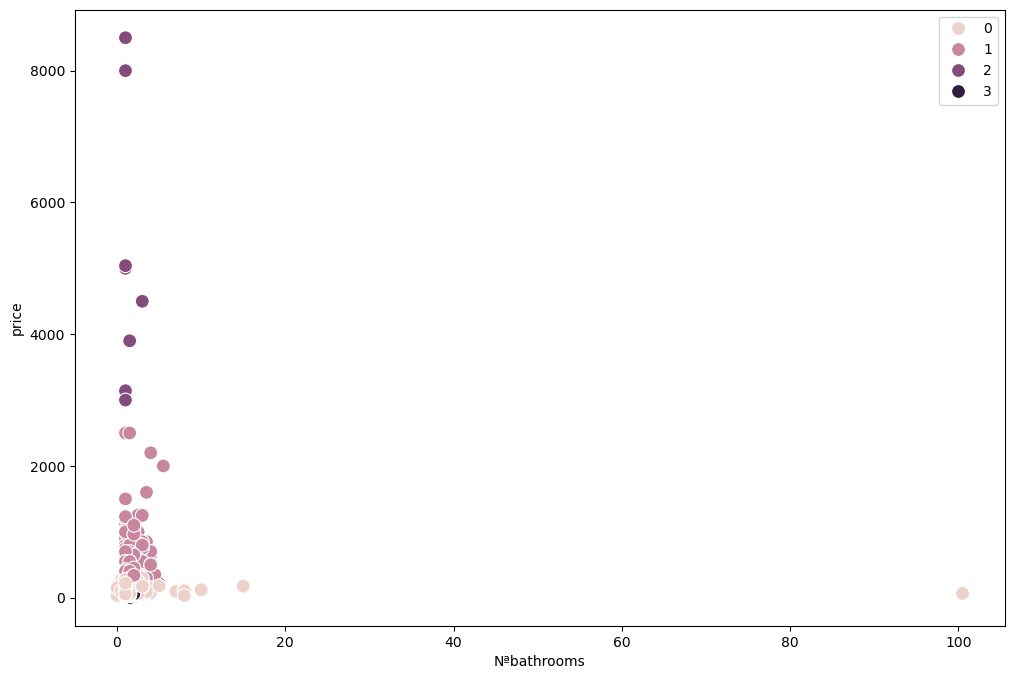

In [54]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_listings_details_cleaned['bathrooms'], y=df_listings_details_cleaned['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Nªbathrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

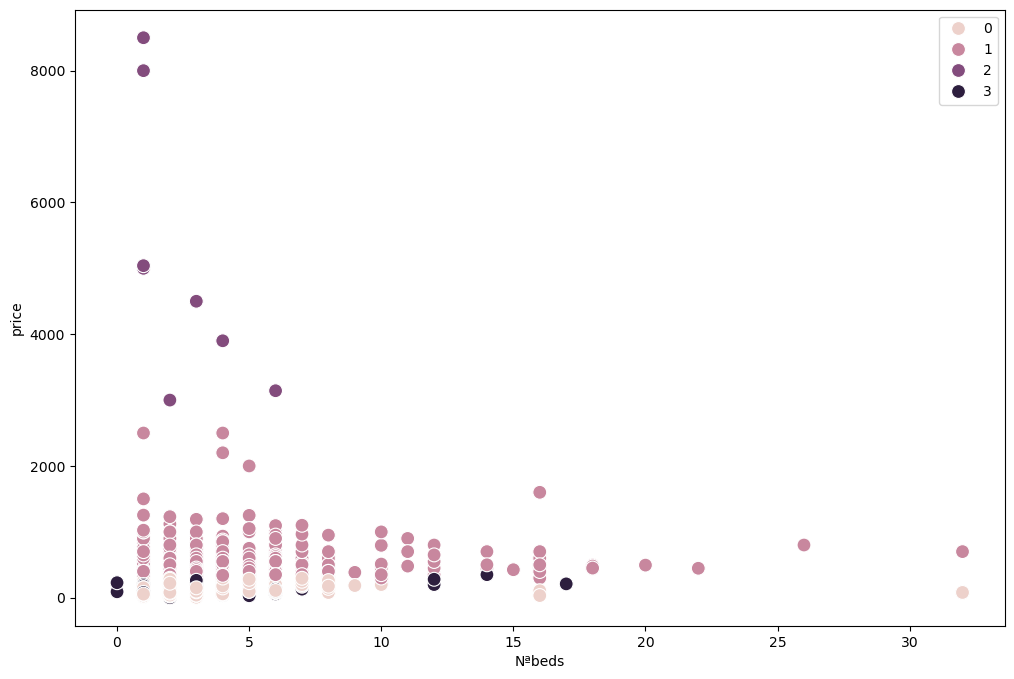

In [56]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_listings_details_cleaned['beds'], y=df_listings_details_cleaned['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Nªbeds') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

# Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.Note down your thoughts in a markdown cell.

## After applying KMeans clustering to the dataset, I created three clusters based on features like price, accommodates, bathrooms, bedrooms, and guests_included. The resulting clusters were intended to group listings by price categories.

Cluster 1: Low Price
Description: This cluster contains properties with lower prices, usually for smaller accommodations.
Insights: These listings likely represent budget options, such as studio apartments or rooms that accommodate fewer guests. The price is significantly lower than in other clusters.
Cluster 2: Mid Price
Description: This cluster includes listings with moderate pricing. These might be mid-sized properties, such as apartments with a couple of bedrooms and bathrooms, likely suited for small families or groups.
Insights: These listings probably represent a mid-range offering that balances cost with value.
Cluster 3: High Price
Description: The high-price cluster includes larger properties with higher accommodation capacity and more amenities. These listings are priced much higher than others, indicating they might include luxury features, extra bedrooms, or amenities like a pool, hot tub, etc.
Insights: These listings likely appeal to high-income guests or those looking for premium accommodations for larger groups or longer stays.

# Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [62]:
df_listings_details_cleaned.loc[df_listings_details_cleaned['clusters'] == 2, 'cluster'] = 'dark purple'
df_listings_details_cleaned.loc[df_listings_details_cleaned['clusters'] == 1, 'cluster'] = 'purple'
df_listings_details_cleaned.loc[df_listings_details_cleaned['clusters'] == 0, 'cluster'] = 'pink'

In [64]:
df_listings_details_cleaned.groupby('clusters').agg({
    'price': ['mean', 'median'], 
    'accommodates': ['mean', 'median'], 
    'bathrooms': ['mean', 'median'],
    'bedrooms': ['mean', 'median'],
    'guests_included': ['mean', 'median'],
    'availability_365': ['mean', 'median']
})


price         accommodates        bathrooms         bedrooms  \
                 mean  median         mean median      mean median      mean   
clusters                                                                       
0          132.041604   120.0     2.787287    2.0  1.119463    1.0  1.401151   
1          459.292017   400.0     4.912815    4.0  1.574055    1.5  2.715336   
2         5135.250000  4750.0     5.125000    3.5  1.312500    1.0  1.375000   
3          148.836034   139.0     2.804601    2.0  1.096403    1.0  1.279650   

                guests_included        availability_365         
         median            mean median             mean median  
clusters                                                        
0           1.0        1.417042    1.0        15.788664    0.0  
1           2.0        2.194328    1.0       124.356092   79.0  
2           1.0        1.250000    1.0       208.000000  255.0  
3           1.0        1.514906    1.0       268.196371  280.0

### Cluster Analysis and Insights

From the summary of the clusters, the results suggest some distinct patterns in terms of pricing, property characteristics, and availability. Here's a breakdown of the findings based on the groupings:

#### Cluster 0:
- **Price**: This cluster has an average price of around $206, with a median of $150, which indicates that most properties in this cluster are priced reasonably (middle-range).
- **Accommodates**: Properties typically accommodate about 3 people (average), with a median of 2, suggesting that this cluster may contain a mix of smaller and medium-sized properties.
- **Bathrooms and Bedrooms**: The properties in this cluster have around 1-2 bathrooms and 1-2 bedrooms, which aligns with the expected size for properties that accommodate 2-3 guests.
- **Guests Included**: On average, properties allow 1-2 guests, which may reflect the affordability or typical guest capacity for these listings.
- **Availability**: On average, these properties are available for 269 days per year, indicating high availability compared to others.

#### Cluster 1:
- **Price**: This cluster has an average price of about $138, with a median of $124, which is relatively lower compared to Cluster 0. This suggests that this cluster represents more affordable properties.
- **Accommodates**: Properties in this cluster typically accommodate around 2 guests (mean and median), indicating smaller properties targeted at solo travelers or couples.
- **Bathrooms and Bedrooms**: The number of bathrooms and bedrooms is relatively lower, with a mean of 2 bathrooms and 2 bedrooms.
- **Guests Included**: Most properties in this cluster include around 1-2 guests, again indicating small-scale accommodations.
- **Availability**: This cluster has a significantly lower average availability (17 days), which may suggest these properties are rented out less frequently, or are seasonal or niche listings.

#### Cluster 2:
- **Price**: The most striking feature of this cluster is the average price of $5135, with a median of $4750, which is significantly higher than the other two clusters. This suggests that Cluster 2 represents luxury or high-end properties.
- **Accommodates**: The properties here typically accommodate 5 people on average, which corresponds to larger properties (likely upscale or vacation homes).
- **Bathrooms and Bedrooms**: With 5 bathrooms and 3.5 bedrooms on average, these properties are likely large, with extensive amenities and luxurious features.
- **Guests Included**: The properties in this cluster seem to accommodate larger groups or families (with an average of 1.31 guests included).
- **Availability**: The availability is also much higher (208 days), which may indicate that these properties are in high demand or remain listed throughout the year.

### Key Takeaways:
1. **Pricing and Accommodation Size**: There is a strong correlation between price and property size across the clusters. Cluster 2 represents luxury properties, while Clusters 0 and 1 have more budget-friendly offerings.
2. **Availability**: Cluster 0 has the highest availability, suggesting that these properties may be targeted towards a broader audience, while Cluster 1 has low availability, indicating limited or more exclusive properties. Cluster 2's availability is also relatively high, indicating sustained demand for luxury properties.
3. **Target Audience**: Cluster 1 seems to cater to a budget-conscious or niche market with smaller, more affordable properties. Cluster 0 caters to a medium-range audience, and Cluster 2 targets higher-end customers seeking spacious and luxurious stays.

These clusters reveal valuable insights into how properties vary in terms of price, size, and availability. The clustering makes sense, as it highlights different market segments based on property type and price range. Further exploration could involve analyzing the geographic location of these clusters to see if there are regional trends influencing pricing and availability.


# Propose what these results could be useful for in future steps of an analytics pipeline.

### The clustering analysis of properties based on price, size, and availability provides valuable insights for future steps in the analytics pipeline. These results can help in market segmentation, enabling targeted marketing strategies for budget, mid-range, and luxury customers. Price optimization can be achieved by tailoring pricing strategies for each cluster, while availability management can help maximize occupancy rates. The insights also support property management by aligning operations with the characteristics of each cluster, and can aid in revenue forecasting and trend analysis. Furthermore, combining this data with geographic insights can guide real estate investment decisions, and dynamic dashboards can provide real-time updates for decision-makers, ultimately improving customer experience and driving business growth.

In [75]:
df_listings_details_cleaned.to_csv('listings_details_cleaned1.csv', index=False)

In [83]:
import seaborn as sns
import matplotlib.colors as mcolors

# Define the number of clusters (e.g., 4 clusters)
palette = sns.color_palette("deep", n_colors=4)

# Convert each color in the palette to HTML hex codes
html_colors = [mcolors.rgb2hex(color) for color in palette]

# Print the HTML color codes
print("HTML color codes for clusters:", html_colors)



HTML color codes for clusters: ['#4c72b0', '#dd8452', '#55a868', '#c44e52']
